# Non-Linear Least Squares fitting of PXRD Data
This Jupyter notebook loads in XRD as x,y data from a CSV file into a pandas dataframe and performs a non-linear
least-squares fitting of the selected peak regions from the PXRD pattern using the lmfit module. The PXRD data and the relative amplitude and peak shifts are plotted in one figure using matplotlib. 


In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from lmfit.models import VoigtModel

df = pd.read_csv('./C_20 XRD ASCII Data..txt', delimiter='\t')
filtered = df[(df['X2th_deg_20C0'] > 10 )]
df = filtered[(filtered['X2th_deg_20C0'] < 28 )]
xlen,ylen = df.shape

df2 = pd.read_csv('./C_40 XRD ASCII Data.txt', delimiter='\t')
filtered = df2[(df2['X2th_deg_40C0'] > 10 )]
df2 = filtered[(filtered['X2th_deg_40C0'] < 28 )]
xlen2,ylen2 = df2.shape

Graphing of PXRD Data
=============
Plot setup for the PXRD data,  plotted with an offset for a waterfall-esque graph. 
The colour palette is normalized to the number of entries in each series.

In [2]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'Garamond'})

ax = fig.add_subplot(221, facecolor='whitesmoke')
ax.set_title('In Operando SR-PXRD of Charging @ C/20')
colors = iter(cm.jet(np.linspace(0, 1, int(ylen/2))))
for iy in range(2,ylen,2):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ylen-iy)*0.03
    x = df.iloc[:,iy]
    y = df.iloc[:,iy+1]
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
    ax.set_xlabel('2θ (°)', color='k', fontsize=18)
    ax.set_ylabel('Intensity(a.u.)', color='k', fontsize=18)
    ax.set_xlim(11, 28)
    ax.set_ylim(0, 2.2)
    ax.spines['bottom'].set_color('k')
    ax.spines['top'].set_color('k') 
    ax.spines['right'].set_color('k')
    ax.spines['left'].set_color('k')
    i = int((iy+1)*2)
    ax.plot(x, y + offset, color='k', lw=0.5, zorder=i)
    ax.fill_between(x, y+offset, offset, facecolor=next(colors), lw=0, zorder=i-1)
ax.axvline(x=15.6, color='darkslategrey')
ax.axvline(x=15.44, color='darkslategrey')
ax.axvline(x=16.72, color='darkslategrey')
ax.text(15.7,2.13,'(202)',rotation=90, color='darkslategrey', fontsize=12, family="Arial")
ax.text(14.85,2.1,r"$(30\overline{1}),(10\overline{3})$",rotation=90, color='darkslategrey', fontsize=12, family="Arial")
ax.text(16.8,2.13,'(020)',rotation=90, color='darkslategrey', fontsize=12, family="Arial")
ax.text(23, 2.0, r"$P2_1$ Reflections", color='lightslategray')

ax2 = fig.add_subplot(222, facecolor='whitesmoke')
ax2.set_title('In Operando SR-PXRD of Charging @ C/40')
color2 = iter(cm.jet(np.linspace(0, 1, int(ylen2/2))))
for iy in range(2,ylen2,2):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ylen2-iy)*0.005
    x = df2.iloc[:,iy]
    y = df2.iloc[:,iy+1]
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
    ax2.set_xlabel('2θ (°)', color='k', fontsize=18)
    ax2.set_ylabel('Intensity(a.u.)', color='k', fontsize=18)
    ax2.set_xlim(11, 28)
    ax2.set_ylim(0, 0.4)
    ax2.spines['bottom'].set_color('k')
    ax2.spines['top'].set_color('k') 
    ax2.spines['right'].set_color('k')
    ax2.spines['left'].set_color('k')
    i = int((iy+1)*2)
    ax2.plot(x, y + offset, color='k', lw=0.5, zorder=i)
    ax2.fill_between(x, y+offset, offset, facecolor=next(color2), lw=0, zorder=i-1)
ax2.axvline(x=15.7, color='lightslategrey')
ax2.axvline(x=15.66, color='lightslategrey')
ax2.axvline(x=16.72, color='lightslategrey')
ax2.axvline(x=21.8, color='lightslategrey')
ax2.text(15.8,0.39,'(020)',rotation=90, color='lightslategrey',fontsize=12, family="Arial")
ax2.text(15.1,0.39,'(210)',rotation=90, color='lightslategrey', fontsize=12, family="Arial")
ax2.text(16.8,0.39,'(002)',rotation=90, color='lightslategrey', fontsize=12, family="Arial")
ax2.text(21.9,0.39,'(202)',rotation=90, color='lightslategrey', fontsize=12, family="Arial")
ax2.text(23, 0.36, r"$Pmn2_1$ Reflections", color='lightslategray')


Text(23,0.36,'$Pmn2_1$ Reflections')

Least-Squares fitting of peak regions A, B and C
====================
The following two cells contain the LMFIT of the three regions A, B, and C defined via tuple using the <i>peaks</i> list below.

The model selected for these fits is the VoigtModel: https://lmfit.github.io/lmfit-py/builtin_models.html#voigtmodel

The results of each fit are stored in dictionary, and the peak amplitude and centres are normalized and added to the figure in the following two cells.  


In [3]:

ax3 = fig.add_subplot(223, facecolor='whitesmoke')
ax4 = fig.add_subplot(224, facecolor='whitesmoke')

c_20_cap = [0, 20.703, 36.974, 69.513, 102.5, 142.73, 169.36, 180.25]
peaks = [(15.1,16.4),(16.3, 17.6),(21.4, 22.3)]
colors = ['k','r','g','b','c']

result_20 = {}
amp_20 = {}
centre_20 = {}
i=0
mean = []
for start, stop in peaks:
    i = i + 1
    pk = "peak" + str(i)
    result_20[pk] = {}
    amp_20[pk] = []
    centre_20[pk] = []
    #print("Peak %s: [%s:%s]" % (i, start,stop))
    itr = zip(df.keys()[2::2], df.keys()[3::2])
    for ix, iy in itr:
        x = df[(df[ix] > start)]
        x = x[(df[ix] < stop)]
        y = np.array(x[iy])
        x = np.array(x[ix])
        mod = VoigtModel()
        pars = mod.guess(y, x=x)
        result_20[pk][ix] = mod.fit(y, pars, x=x)
        #Uncomment the following line to get a fit report
        #print(result_20[pk][ix].fit_report(min_correl=0.25))
        amp_20[pk].append(result_20[pk][ix].best_values['amplitude'])
        centre_20[pk].append(result_20[pk][ix].best_values['center'])

        
trace = []
label = [], 
alphabet = ['A', 'B','C','D','E','F']
for i, peak in enumerate(amp_20):
    amp_20[peak] = amp_20[peak]/np.amax(np.array(amp_20[peak]))
    label = 'C/20 Region ' + alphabet[i]
    centre_20[peak] = [x - centre_20[peak][0] for x in centre_20[peak]]
    color = colors[(i + 1 % len(colors))]
    # Add data to the graphs
    ax3.plot(c_20_cap, amp_20[peak], color=color, marker='^', label=label)
    ax4.plot(c_20_cap, centre_20[peak], color=color, marker='^', label=label)



C:\Users\arthurz\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [4]:
c_40_cap = [0, 6.772, 13.546, 20.311, 27.082, 40.62, 54.164, 71.09, 88.015, 104.96, 121.87, 138.79, 155.71]

result_40 = {}
amp_40 = {}
centre_40 = {}
i=0
#Perform the fitting for each XRD trace for each region.
for start, stop in peaks:
    i = i + 1
    pk = "peak" + str(i)
    result_40[pk] = {}
    amp_40[pk] = []
    centre_40[pk] = []
    itr = zip(df2.keys()[2::2], df2.keys()[3::2])
    for ix, iy in itr:
        x = df2[(df2[ix] > start)]
        x = x[(df2[ix] < stop)]
        y = np.array(x[iy])
        x = np.array(x[ix])
        mod = VoigtModel()
        pars = mod.guess(y, x=x)
        result_40[pk][ix] = mod.fit(y, pars, x=x)
        #Uncomment the following line to get a fit report
        #print(result2[pk][ix].fit_report(min_correl=0.25))
        amp_40[pk].append(result_40[pk][ix].best_values['amplitude'])
        centre_40[pk].append(result_40[pk][ix].best_values['center'])
# Fit complete add data to graph        
for j, peak in enumerate(amp_40):
    #Normalize the peak amplitude to the max in the series.
    amp_40[peak] = amp_40[peak]/np.amax(np.array(amp_40[peak]))
    label = 'C/40 Region ' + alphabet[j]
    # Make peak centre a relative array wrt to initial values.
    centre_40[peak] = [x - centre_40[peak][0] for x in centre_40[peak]]
    color = colors[(j + 1 % len(colors))]
    # Add data to the graphs
    ax3.plot(c_40_cap, amp_40[peak], color=color, marker='o',
             linestyle='--', label=label)
    ax4.plot(c_40_cap, centre_40[peak], color=color, marker='o', 
             linestyle='--', label=label)


C:\Users\arthurz\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


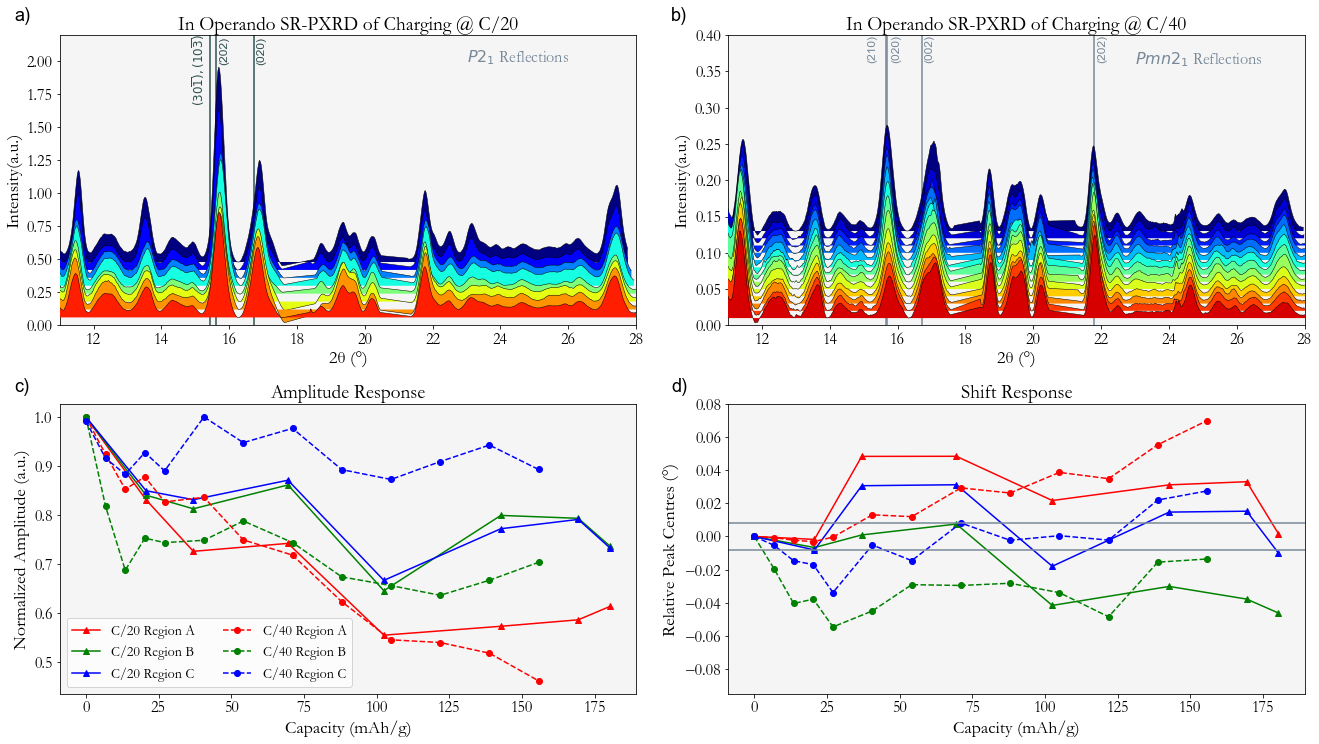

In [5]:
# Setup plot titles, axis labels and limits    
title = 'Amplitude Response'
ax3.set_title(title)
ax3.set_xlabel('Capacity (mAh/g)', color='k', fontsize=18)
ax3.set_ylabel('Normalized Amplitude (a.u.)', color='k', fontsize=18)
ax3.spines['bottom'].set_color('k')
ax3.spines['top'].set_color('k') 
ax3.spines['right'].set_color('k')
ax3.spines['left'].set_color('k')
title = 'Shift Response'
ax4.set_title(title)
ax4.set_xlabel('Capacity (mAh/g)', color='k', fontsize=18)
ax4.set_ylabel('Relative Peak Centres (°)', color='k', fontsize=18)
ax4.set_ylim(-0.095, 0.08)
ax4.spines['bottom'].set_color('k')
ax4.spines['top'].set_color('k') 
ax4.spines['right'].set_color('k')
ax4.spines['left'].set_color('k')
# Add error bars on peak position
ax4.axhline(y=0.008, color='lightslategrey')
ax4.axhline(y=-0.008, color='lightslategrey')
# Place legends in optimal location
ax3.legend(scatterpoints=1,
           loc='lower left',
           ncol=2,
           fontsize=14)

plt.tight_layout()

plt.figtext(0.013,0.97, 'a)',fontsize=18, family='Arial')
plt.figtext(0.506, 0.97, 'b)', fontsize=18, family='Arial')
plt.figtext(0.013, 0.48, 'c)',fontsize=18, family='Arial')
plt.figtext(0.506, 0.48, 'd)',fontsize=18, family='Arial')
plt.savefig('XRD_Series.png', dpi=600)

plt.show()


In [195]:
fig.savefig("XRD_Series.png")

Check Individual Fit Reports
=========

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 167
    # variables        = 3
    chi-square         = 0.330
    reduced chi-square = 0.002
    Akaike info crit   = -1034.038
    Bayesian info crit = -1024.684
[[Variables]]
    sigma:       0.08780564 +/- 0.000803 (0.92%) (init= 0.1087921)
    center:      15.7031337 +/- 0.001097 (0.01%) (init= 15.70404)
    amplitude:   0.63563895 +/- 0.004465 (0.70%) (init= 1.111539)
    gamma:       0.08780564 +/- 0.000803 (0.92%)  == 'sigma'
    fwhm:        0.31621535 +/- 0.002893 (0.92%)  == '3.6013100*sigma'
    height:      2.88800631 +/- 0.020210 (0.70%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.654 



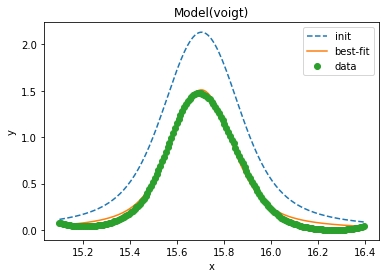

In [8]:
peak = 'peak1'
pattern = 'X2th_deg_20C1'
result_20[peak][pattern].plot_fit() 
print(result_20[peak][pattern].fit_report(min_correl=0.25))
plt.show()

In [19]:
covar40 = pd.read_csv('./covarC40.csv', index_col=0)
covar20 = pd.read_csv('./covarC20.csv', index_col=0)

In [222]:
covar40['RegA_Amp'] = amp_40['peak1']
covar40['RegB_Amp'] = amp_40['peak2']
covar40['RegC_Amp'] = amp_40['peak3']
covar40['RegA_Shift'] = centre_40['peak1']
covar40['RegB_Shift'] = centre_40['peak2']
covar40['RegC_Shift'] = centre_40['peak3']

In [223]:
covar20['RegA_Amp'] = amp_20['peak1']
covar20['RegB_Amp'] = amp_20['peak2']
covar20['RegC_Amp'] = amp_20['peak3']
covar20['RegA_Shift'] = centre_20['peak1']
covar20['RegB_Shift'] = centre_20['peak2']
covar20['RegC_Shift'] = centre_20['peak3']

In [229]:
#covar40.to_csv('./covarC40.csv', sep=',')
#covar20.to_csv('./covarC20.csv', sep=',')

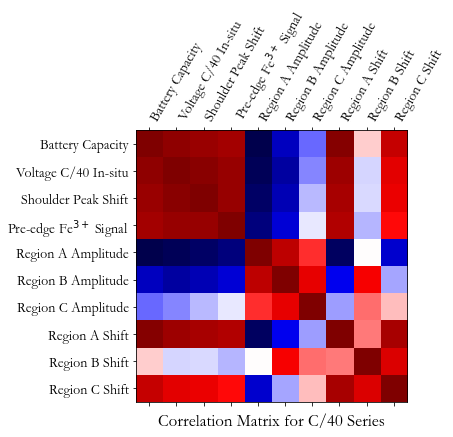

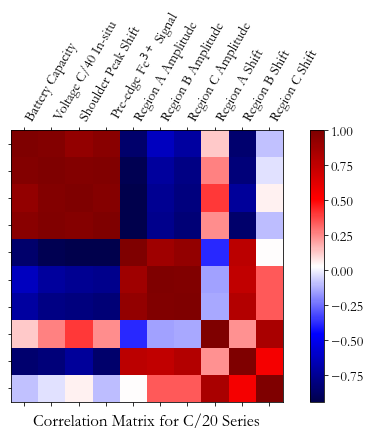

In [14]:
corr40 = covar40.corr()
corr20 = covar20.corr()
alpha = [ 'Battery Capacity', 'Voltage C/40 In-situ','Shoulder Peak Shift', 
         'Pre-edge Fe$^{3+}$ Signal', 'Region A Amplitude', 'Region B Amplitude', 
         'Region C Amplitude', 'Region A Shift', 'Region B Shift', 'Region C Shift',]
alpha2 = [ 'Battery Capacity', 'Voltage C/20 In-situ','Shoulder Peak Shift', 
         'Pre-edge Fe$^{3+}$ Signal', 'Region A Amplitude', 'Region B Amplitude', 
         'Region C Amplitude', 'Region A Shift', 'Region B Shift', 'Region C Shift',]

fig = plt.figure()
fig.set_size_inches(10,5)
fig2 = plt.figure()
fig2.set_size_inches(10,5)
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'Garamond'})

ax = fig.add_subplot(111)
ax2 = fig2.add_subplot(111)
cax = ax.matshow(corr40, interpolation='nearest', cmap='seismic')
cax2 = ax2.matshow(corr20, interpolation='nearest', cmap='seismic')
fig2.colorbar(cax2)

ax.set_title("Correlation Matrix for C/40 Series", y = -0.11)
ax.tick_params(axis='x', rotation=60)
ax.set_xticks(range(len(alpha)))
ax.set_yticks(range(len(alpha)))
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)
ax2.set_title("Correlation Matrix for C/20 Series", y = -0.11)
ax2.tick_params(axis='x', rotation=60)
ax2.set_xticks(range(len(alpha)))
ax2.set_yticks(range(len(alpha)))
ax2.set_xticklabels(alpha)
ax2.set_yticklabels("")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
for tick in ax2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
#fig.savefig("c40_correlation_matrix.png",bbox_inches='tight', dpi=600)
#fig2.savefig("c20_correlation_matrix.png", bbox_inches='tight', dpi=600)

plt.show()


                 capacity  voltage in-situ  pkcentre    ferric  RegA_Amp  \
capacity         0.000000         0.047578  0.030051  0.106763  0.128033   
voltage in-situ  0.047578         0.000000  0.021405  0.088983  0.020958   
pkcentre         0.030051         0.021405  0.000000  0.068769  0.035458   
ferric           0.106763         0.088983  0.068769  0.000000  0.090364   
RegA_Amp         0.128033         0.020958  0.035458  0.090364  0.000000   
RegB_Amp         0.030164         0.026504  0.054872  0.162896  0.122297   
RegC_Amp         0.433335         0.557230  0.670630  0.789333  0.507859   
RegA_Shift       0.840508         0.610789  0.433179  0.553710  0.547269   
RegB_Shift       0.949678         0.748343  0.658060  0.717056  0.757583   
RegC_Shift       0.809888         0.634930  0.519444  0.578125  0.656914   

                 RegB_Amp  RegC_Amp  RegA_Shift  RegB_Shift  RegC_Shift  
capacity         0.030164  0.433335    0.840508    0.949678    0.809888  
voltage in-situ

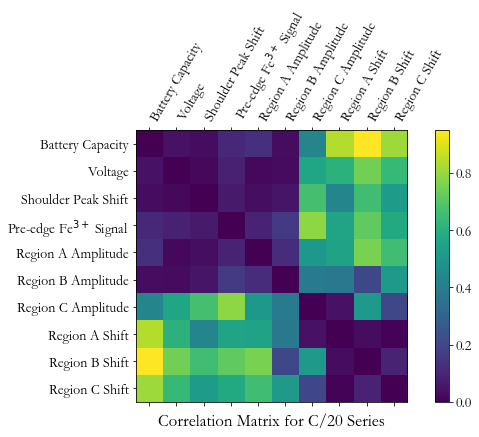

In [25]:
corr40 = covar40.corr()
corr20 = covar20.corr()
corr = abs(corr40 - corr20)
print(corr)
alpha = [ 'Battery Capacity', 'Voltage','Shoulder Peak Shift', 
         'Pre-edge Fe$^{3+}$ Signal', 'Region A Amplitude', 'Region B Amplitude', 
         'Region C Amplitude', 'Region A Shift', 'Region B Shift', 'Region C Shift',]

fig2 = plt.figure()
fig2.set_size_inches(10,5)
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'Garamond'})

ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(corr, interpolation='nearest', cmap='viridis')
fig2.colorbar(cax2)

ax2.set_title("Correlation Matrix for C/20 Series", y = -0.11)
ax2.tick_params(axis='x', rotation=60)
ax2.set_xticks(range(len(alpha)))
ax2.set_yticks(range(len(alpha)))
ax2.set_xticklabels(alpha)
ax2.set_yticklabels(alpha)

for tick in ax2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
#fig.savefig("c40_correlation_matrix.png",bbox_inches='tight', dpi=600)
#fig2.savefig("c20_correlation_matrix.png", bbox_inches='tight', dpi=600)

plt.show()


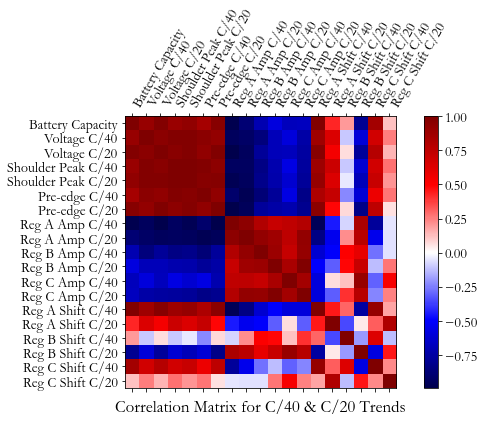

In [26]:
covar2040 = pd.read_csv('./covar_C20C40.csv', index_col=0)
corr2040 = covar2040.corr()
alpha = ['Battery Capacity', 'Voltage C/40','Voltage C/20', 'Shoulder Peak C/40', 'Shoulder Peak C/20', 
         'Pre-edge C/40','Pre-edge C/20', 'Reg A Amp C/40', 'Reg A Amp C/20', 'Reg B Amp C/40','Reg B Amp C/20', 
         'Reg C Amp C/40', 'Reg C Amp C/20', 'Reg A Shift C/40', 'Reg A Shift C/20', 'Reg B Shift C/40',
        'Reg B Shift C/20', 'Reg C Shift C/40', 'Reg C Shift C/20']
fig3 = plt.figure()
fig3.set_size_inches(10,5)
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'Garamond'})
ax = fig3.add_subplot(111)
cax = ax.matshow(corr2040, interpolation='nearest', cmap='seismic')
fig3.colorbar(cax)

ax.set_title("Correlation Matrix for C/40 & C/20 Trends", y = -0.11)
ax.tick_params(axis='x', rotation=60)
ax.set_xticks(range(len(alpha)))
ax.set_yticks(range(len(alpha)))
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
fig3.savefig("c2040_correlation_matrix.png",bbox_inches='tight', dpi=600)

plt.show()
